In [2]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import wavio
from scipy.signal import butter, lfilter

In [3]:
filename = "input4.wav"

Recording Audio Input

In [4]:
def record_audio(duration, samplingFrequency, filename):
    print("Recording...")
    audio = sd.rec(int(duration * samplingFrequency), samplerate=samplingFrequency, channels=1, dtype='int16')
    sd.wait() 
    print("Recording complete!")
    wavio.write(filename, audio, samplingFrequency, sampwidth=2)
    print(f"Saved to {filename}")

samplingFrequency = 16000
duration = 10  
record_audio(duration, samplingFrequency, filename)

Recording...
Recording complete!
Saved to input4.wav


Converting audio input to frequency domain and plotting the magnitude spectrum

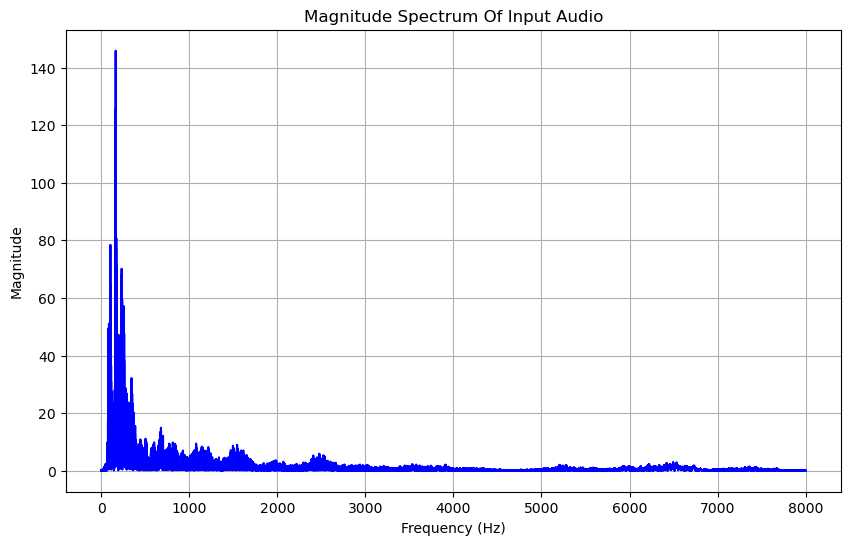

In [5]:
def convert_to_freq_domain(filename):
    sample_rate, audio_data = wavfile.read(filename)
    if audio_data.dtype == np.int16:
        audio_data = audio_data / 32768.0
    elif audio_data.dtype == np.int32:
        audio_data = audio_data / 2147483648.0
    n = len(audio_data)
    frequencies = np.fft.rfftfreq(n, d=1/sample_rate)  # Frequency range
    fft_magnitude = np.abs(np.fft.rfft(audio_data)) 
    return (frequencies, fft_magnitude)

def plot_signal(time, signal, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(time, signal, color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.show()

sample_rate, audio_data = wavfile.read(filename)
frequencies, fft_magnitude = convert_to_freq_domain(filename)
plot_signal(frequencies, fft_magnitude, "Magnitude Spectrum Of Input Audio", "Frequency (Hz)", "Magnitude")

Applying LPF to limit max frequency

In [6]:
def butter_lowpass(cutoff, samplingFrequency, order=5):
    nyquist = 0.5 * samplingFrequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lowpass_filter(data, cutoff, samplingFrequency, order=5):
    b, a = butter_lowpass(cutoff, samplingFrequency, order=order)
    filtered_data = lfilter(b, a, data)
    return filtered_data

cutoff_frequency = 4000  
audio_data = audio_data.astype(np.float32)  # Convert to float for processing
# Apply Low-Pass Filter
filtered_audio = apply_lowpass_filter(audio_data, cutoff_frequency, sample_rate)
# Normalize filtered audio for saving
filtered_audio = np.int16(filtered_audio / np.max(np.abs(filtered_audio)) * 32767)
# Save filtered audio
filtered_filename = f"filtered_{filename}"
wavio.write(filtered_filename, filtered_audio, sample_rate, sampwidth=2)
print(f"Filtered audio saved to {filtered_filename}")

Filtered audio saved to filtered_input4.wav


Converting the filtered audio signal and plotting the magnitude spectrum

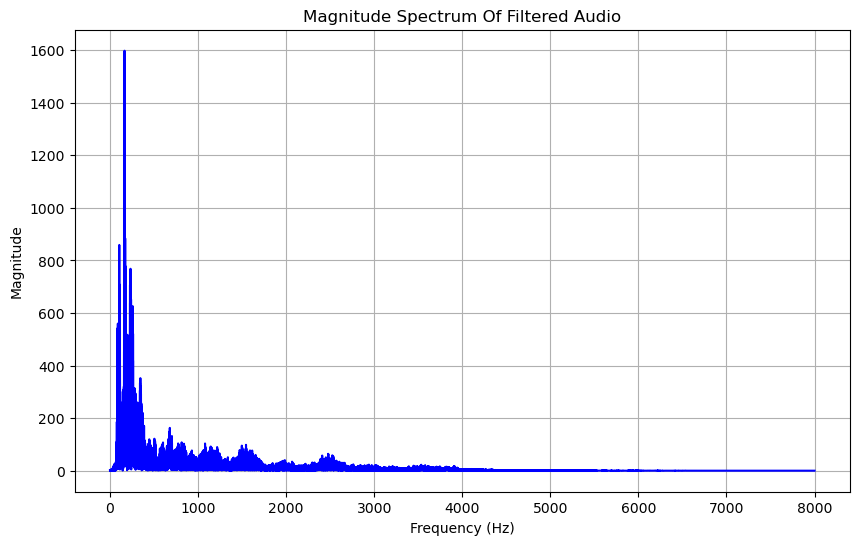

In [7]:
frequencies, fft_magnitude = convert_to_freq_domain(filtered_filename)
plot_signal(frequencies, fft_magnitude, "Magnitude Spectrum Of Filtered Audio", "Frequency (Hz)", "Magnitude")